# Proyecto ICFES - Análisis de Clusters y Series de Tiempo
# Realizado por: Santiago Arciniegas, Juan Pablo Bahamon y Ana Camila Sánchez

**Objetivo:**  
Implementar técnicas de *clusterización* (K-Means, DBSCAN, jerárquico)  
y *modelos de predicción temporal* (ARIMA, RNN) sobre los resultados del ICFES  
para identificar patrones y tendencias en el desempeño educativo.

**Herramientas:**  
`pandas`, `numpy`, `scikit-learn`, `statsmodels`, `matplotlib`, `seaborn`, `jupyter`


In [2]:
import os
print(os.getcwd())



C:\Users\Camila\icfes2\src\icfes2\notebooks


In [ ]:

# INSTALAR DEPENDENCIAS FALTANTES

!poetry add seaborn


In [46]:
df = pd.read_csv("Pruebas_ICFES_20251104.csv")


In [45]:

# Cargamos y preparamos los datos

# Cargar datos
df = pd.read_csv(r"C:\Users\Camila\icfes2\src\icfes2\notebooks\Pruebas_ICFES_20251104.csv")

# Ver estructura
print("Dimensiones:", df.shape)
df.head()



Dimensiones: (63, 13)


,MUNICIPIO,INSTITUCION EDUCATIVA,AÑO 2014,AÑO 2015,AÑO 2016,AÑO 2017,AÑO 2018,AÑO 2019,AÑO 2020,AÑO 2021,AÑO 2022,AÑO 2023,AÑO 2024
0,Apía,Centro Educativo Bachillerato en Bienestar Rur...,D,D,D,D,D,D,NR,D,D,D,D
1,Apía,Colegio Sagrada Familia,B,B,B,B,B,C,C,C,C,C,D
2,Apía,Instituto Técnico Industrial Integrado Santo T...,C,C,C,C,C,C,D,C,C,C,B
3,Apía,IE LA FLORESTA - Sede Única,NR,NR,NR,NR,NR,NR,D,D,D,D,D
4,Balboa,Colegio Oficial Mixto Santo Domingo Savio,C,C,C,B,C,C,C,C,C,C,C


In [4]:
import numpy as np

# Mapeo de categorías a números
mapa_valores = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'NR': np.nan}

# Crear una copia del DataFrame para trabajo numérico
df_numerico = df.copy()

# Aplicar el mapeo a todas las columnas de años
for col in df.columns[2:]:
    df_numerico[col] = df[col].map(mapa_valores)

df_numerico.head()


,MUNICIPIO,INSTITUCION EDUCATIVA,AÑO 2014,AÑO 2015,AÑO 2016,AÑO 2017,AÑO 2018,AÑO 2019,AÑO 2020,AÑO 2021,AÑO 2022,AÑO 2023,AÑO 2024
0,Apía,Centro Educativo Bachillerato en Bienestar Rur...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0
1,Apía,Colegio Sagrada Familia,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0
2,Apía,Instituto Técnico Industrial Integrado Santo T...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0
3,Apía,IE LA FLORESTA - Sede Única,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0
4,Balboa,Colegio Oficial Mixto Santo Domingo Savio,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


MUNICIPIO                0
INSTITUCION EDUCATIVA    0
AÑO 2014                 0
AÑO 2015                 0
AÑO 2016                 0
AÑO 2017                 0
AÑO 2018                 0
AÑO 2019                 0
AÑO 2020                 0
AÑO 2021                 0
AÑO 2022                 0
AÑO 2023                 0
AÑO 2024                 0
Cluster_KMeans           0
dtype: int64


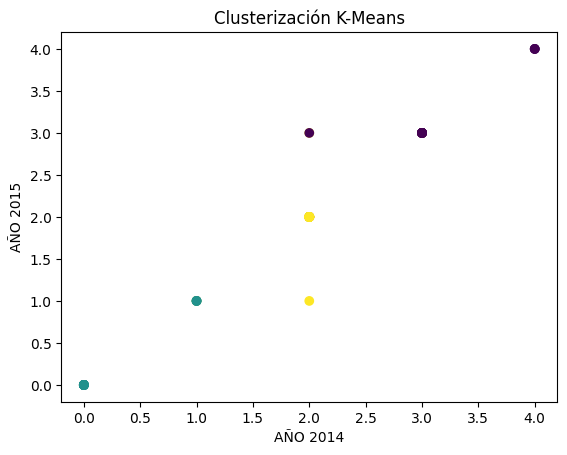

In [44]:
# Eliminar filas con valores faltantes (NaN)
data_cleaned = data.dropna(subset=[f'AÑO {year}' for year in range(2014, 2025)])

# Verificar que no haya más NaN
print(data_cleaned.isna().sum())

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[[f'AÑO {year}' for year in range(2014, 2025)]])

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['Cluster_KMeans'] = kmeans.fit_predict(data_scaled)

# Visualizar los resultados
plt.scatter(data_cleaned['AÑO 2014'], data_cleaned['AÑO 2015'], c=data_cleaned['Cluster_KMeans'], cmap='viridis')
plt.title('Clusterización K-Means')
plt.xlabel('AÑO 2014')
plt.ylabel('AÑO 2015')
plt.show()





Valores NaN después de imputación: 0
Predicciones para 2023 y 2024: 9     0.884915
10    0.888242
Name: predicted_mean, dtype: float64
Valores reales para 2023 y 2024: [1. 1.]
RMSE: 0.11343386215407761


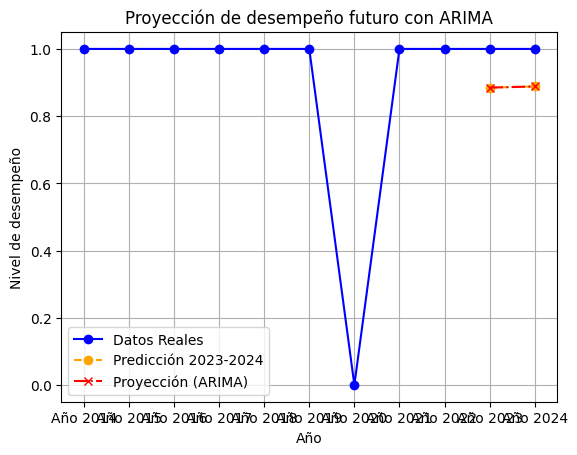

In [52]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.impute import SimpleImputer

# Cargar los datos
data = pd.read_csv(r"C:\Users\Camila\icfes2\src\icfes2\notebooks\Pruebas_ICFES_20251104.csv")

# Crear un diccionario para convertir las calificaciones en valores numéricos
calificaciones = {
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1,
    'NR': 0
}

# Convertir las calificaciones a valores numéricos para los años 2014 a 2024
for year in range(2014, 2025):
    column_name = f'AÑO {year}'
    data[column_name] = data[column_name].map(calificaciones)

# Tomar las calificaciones de un municipio específico (por ejemplo, el primer municipio)
serie_temporal = data.loc[0, [f'AÑO {year}' for year in range(2014, 2025)]]

# Imputar los valores NaN en la serie temporal utilizando la media
imputer = SimpleImputer(strategy='mean')
serie_temporal_imputed = imputer.fit_transform(serie_temporal.values.reshape(-1, 1))

# Verificar si aún hay NaN después de la imputación
print(f"Valores NaN después de imputación: {np.isnan(serie_temporal_imputed).sum()}")

# Convertir la serie imputada a un DataFrame de pandas
serie_temporal_imputed = pd.Series(serie_temporal_imputed.flatten(), index=[f'Año {year}' for year in range(2014, 2025)])

# Dividir en entrenamiento y prueba
train = serie_temporal_imputed[:9]  # Años 2014-2022
test = serie_temporal_imputed[9:]   # Años 2023-2024

# Ajustar el modelo ARIMA con los datos de entrenamiento
model = ARIMA(train, order=(1,1,1))  # Ajuste de parámetros (p, d, q)
model_fit = model.fit()

# Predicción para los años 2023 y 2024
forecast = model_fit.forecast(steps=2)  # Predecir los próximos 2 años

# Comparar predicciones con los valores reales
print(f"Predicciones para 2023 y 2024: {forecast}")
print(f"Valores reales para 2023 y 2024: {test.values}")

# Calcular el error (RMSE)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")

# Graficar los resultados
plt.plot(serie_temporal_imputed, label='Datos Reales', color='blue', marker='o')
plt.plot(range(9, 11), forecast, label='Predicción 2023-2024', color='orange', linestyle='--', marker='o')

# Ajuste de la visualización de las predicciones
# Usamos el mismo rango de los años predichos para evitar el ValueError
plt.plot(range(9, 11), forecast, label='Proyección (ARIMA)', color='red', linestyle='-.', marker='x')

# Añadir etiquetas y título
plt.title('Proyección de desempeño futuro con ARIMA')
plt.xlabel('Año')
plt.ylabel('Nivel de desempeño')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()




In [ ]:
# Verificar las dimensiones de X_test
print("Dimensiones de X_test:", X_test.shape)

# Realizar predicciones
predictions = model.predict(X_test)
print("Predicciones:", predictions)

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)

# Verificar que las predicciones estén correctas
print("Predicciones invertidas:", predictions)

# Calcular el error (RMSE)
rmse = np.sqrt(mean_squared_error(test[time_step:], predictions))
print(f"RMSE: {rmse}")

# Graficar los resultados
plt.plot(serie_temporal_imputed, label='Datos Reales', color='blue', marker='o')
plt.plot(range(9+time_step, 11), predictions, label='Predicción LSTM 2023-2024', color='orange', linestyle='--', marker='o')

# Añadir etiquetas y título
plt.title('Proyección de desempeño futuro con LSTM')
plt.xlabel('Año')
plt.ylabel('Nivel de desempeño')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()




In [56]:
import tensorflow as tf
print(tf.__version__)


2.20.0


Valores NaN después de imputación: 0
Dimensiones de X_test después de create_dataset: (1, 1)
Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.7986
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.7627
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.7278
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.6940
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.6610
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.6285
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.5965
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.5648
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.5335
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5023
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.4714
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.4408
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4106
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.3808
Epoch

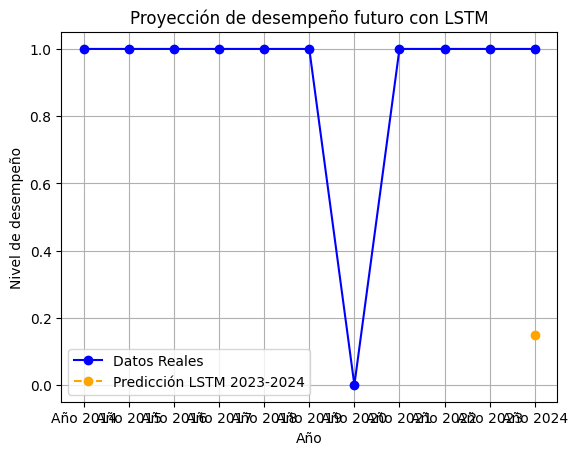

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.impute import SimpleImputer

# Cargar los datos
data = pd.read_csv(r"C:\Users\Camila\icfes2\src\icfes2\notebooks\Pruebas_ICFES_20251104.csv")

# Crear un diccionario para convertir las calificaciones en valores numéricos
calificaciones = {
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1,
    'NR': 0
}

# Convertir las calificaciones a valores numéricos para los años 2014 a 2024
for year in range(2014, 2025):
    column_name = f'AÑO {year}'
    data[column_name] = data[column_name].map(calificaciones)

# Tomar las calificaciones de un municipio específico (por ejemplo, el primer municipio)
serie_temporal = data.loc[0, [f'AÑO {year}' for year in range(2014, 2025)]]

# Imputar los valores NaN en la serie temporal utilizando la media
imputer = SimpleImputer(strategy='mean')
serie_temporal_imputed = imputer.fit_transform(serie_temporal.values.reshape(-1, 1))

# Verificar si aún hay NaN después de la imputación
print(f"Valores NaN después de imputación: {np.isnan(serie_temporal_imputed).sum()}")

# Convertir la serie imputada a un DataFrame de pandas
serie_temporal_imputed = pd.Series(serie_temporal_imputed.flatten(), index=[f'Año {year}' for year in range(2014, 2025)])

# Dividir en entrenamiento y prueba
train = serie_temporal_imputed[:9]  # Años 2014-2022
test = serie_temporal_imputed[9:]   # Años 2023-2024

# Normalizar los datos utilizando MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Reducir time_step a 1 ya que solo tenemos 2 muestras en el conjunto de prueba
time_step = 1  # Ajustamos a 1 porque solo tenemos 2 muestras

# Preparar los datos de prueba para LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X_test, y_test = create_dataset(test_scaled, time_step)

# Comprobar que X_test tenga la forma correcta
print("Dimensiones de X_test después de create_dataset:", X_test.shape)

# Verificar si hay suficientes datos para realizar predicciones
if X_test.shape[0] > 0:  # Asegurarnos de que haya datos en X_test
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    # Crear y entrenar el modelo LSTM
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_test.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Ajustar el modelo con los datos de entrenamiento
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32)

    # Realizar predicciones
    predictions = model.predict(X_test)

    # Invertir la normalización para obtener las predicciones en la escala original
    predictions = scaler.inverse_transform(predictions)

    # Calcular el error (RMSE)
    rmse = np.sqrt(mean_squared_error(test[time_step:], predictions))
    print(f"RMSE: {rmse}")

    # Graficar los resultados
    plt.plot(serie_temporal_imputed, label='Datos Reales', color='blue', marker='o')
    plt.plot(range(9 + time_step, 11), predictions, label='Predicción LSTM 2023-2024', color='orange', linestyle='--', marker='o')

    plt.title('Proyección de desempeño futuro con LSTM')
    plt.xlabel('Año')
    plt.ylabel('Nivel de desempeño')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se puede realizar la predicción porque X_test está vacío o tiene una forma incorrecta.")







Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.8412
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.7278
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.6256
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.5337
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.4520
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.3803
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.3187
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.2676
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.2273
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.1983
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1808
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.1742
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1775
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1878
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2014
Epoch 16/20
1/1 ━━━━━━━━━━━━

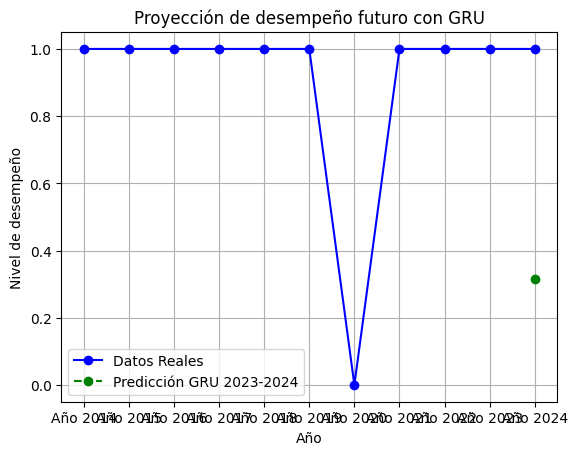

In [63]:
from tensorflow.keras.layers import GRU

# Crear el modelo GRU
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_test.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(units=1))

# Compilar el modelo GRU
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar el modelo GRU con los datos de entrenamiento
gru_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32)

# Realizar predicciones con el modelo GRU
gru_predictions = gru_model.predict(X_test)

# Invertir la normalización para obtener las predicciones en la escala original
gru_predictions = scaler.inverse_transform(gru_predictions)

# Calcular el error (RMSE) para GRU
gru_rmse = np.sqrt(mean_squared_error(test[time_step:], gru_predictions))
print(f"RMSE para GRU: {gru_rmse}")

# Graficar los resultados
plt.plot(serie_temporal_imputed, label='Datos Reales', color='blue', marker='o')
plt.plot(range(9 + time_step, 11), gru_predictions, label='Predicción GRU 2023-2024', color='green', linestyle='--', marker='o')

plt.title('Proyección de desempeño futuro con GRU')
plt.xlabel('Año')
plt.ylabel('Nivel de desempeño')
plt.legend()
plt.grid(True)
plt.show()



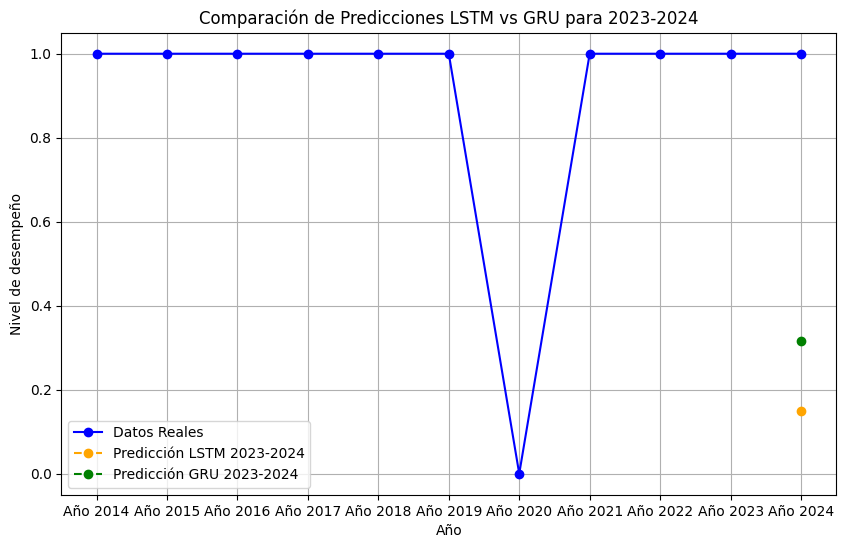

RMSE para LSTM: 0.8500708043575287
RMSE para GRU: 0.6840196549892426


In [64]:
# Graficar las predicciones de LSTM y GRU en la misma gráfica
plt.figure(figsize=(10, 6))

# Datos reales
plt.plot(serie_temporal_imputed, label='Datos Reales', color='blue', marker='o')

# Predicciones LSTM
plt.plot(range(9 + time_step, 11), predictions, label='Predicción LSTM 2023-2024', color='orange', linestyle='--', marker='o')

# Predicciones GRU
plt.plot(range(9 + time_step, 11), gru_predictions, label='Predicción GRU 2023-2024', color='green', linestyle='--', marker='o')

# Añadir etiquetas y título
plt.title('Comparación de Predicciones LSTM vs GRU para 2023-2024')
plt.xlabel('Año')
plt.ylabel('Nivel de desempeño')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Imprimir RMSE para ambos modelos
print(f"RMSE para LSTM: {rmse}")
print(f"RMSE para GRU: {gru_rmse}")



In [65]:
# Ajustar el modelo LSTM o GRU con diferentes parámetros
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Más unidades
model.add(LSTM(units=100))  # Más unidades
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con más épocas y tamaño de batch ajustado
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), 
                    y_train, 
                    epochs=50,  # Más épocas
                    batch_size=16,  # Tamaño de batch ajustado
                    validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))



Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.7894 - val_loss: 0.9776
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.7381 - val_loss: 0.9595
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 0.6887 - val_loss: 0.9415
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 0.6404 - val_loss: 0.9234
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 0.5927 - val_loss: 0.9052
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.5450 - val_loss: 0.8867
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.4972 - val_loss: 0.8680
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.4491 - val_loss: 0.8490
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.4011 - val_loss: 0.8296
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.3536 - val_loss: 0.8098
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.3077 - val_loss: 0.7897
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.2648 - val_loss:

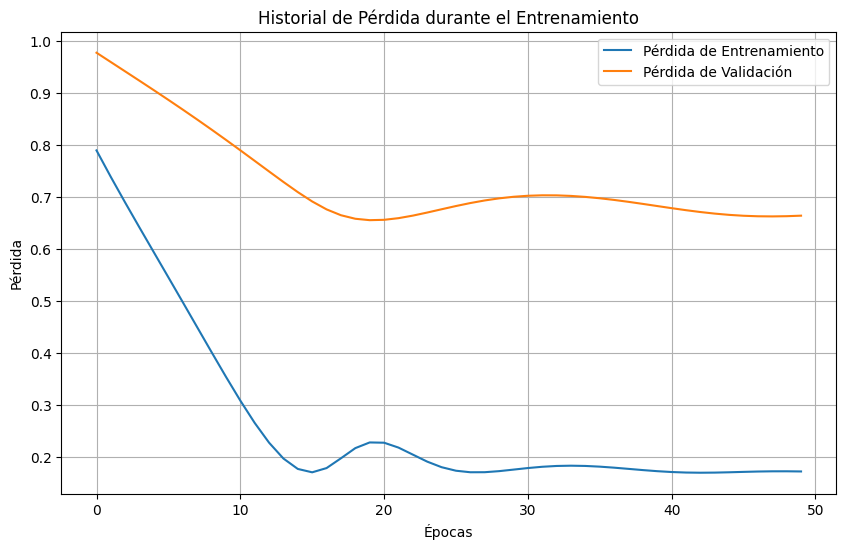

In [66]:
# Graficar el historial de pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Historial de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
RMSE: 0.8147174417972565


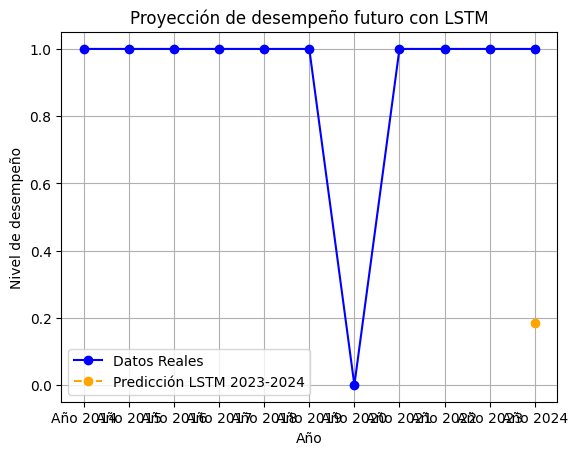

In [67]:
# Realizar predicciones para 2023 y 2024 usando el modelo entrenado
predictions = model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

# Invertir la normalización para obtener las predicciones en la escala original
predictions = scaler.inverse_transform(predictions)

# Calcular el error (RMSE) para las predicciones
rmse = np.sqrt(mean_squared_error(test[time_step:], predictions))
print(f"RMSE: {rmse}")

# Graficar los resultados
plt.plot(serie_temporal_imputed, label='Datos Reales', color='blue', marker='o')
plt.plot(range(9 + time_step, 11), predictions, label='Predicción LSTM 2023-2024', color='orange', linestyle='--', marker='o')

plt.title('Proyección de desempeño futuro con LSTM')
plt.xlabel('Año')
plt.ylabel('Nivel de desempeño')
plt.legend()
plt.grid(True)
plt.show()



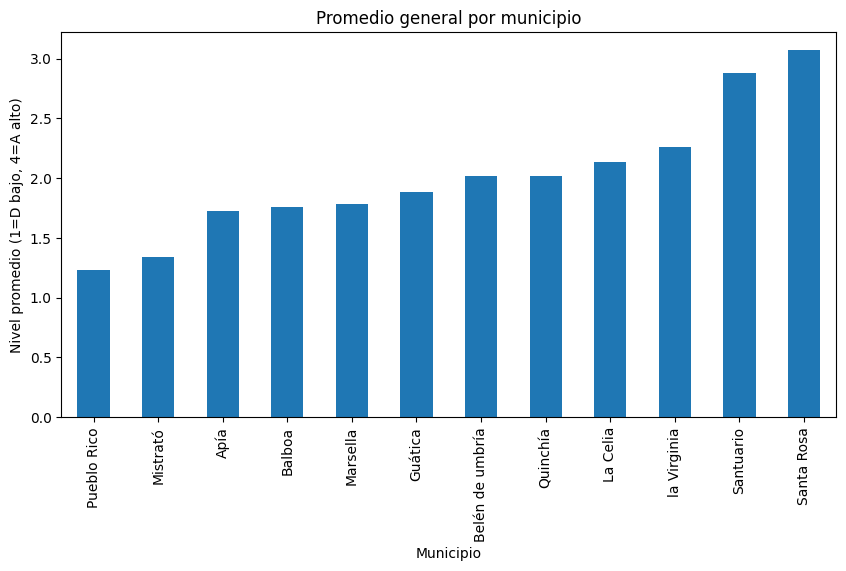

In [30]:
promedios_mun = df_numerico.groupby("MUNICIPIO").mean(numeric_only=True)

promedios_mun.mean(axis=1).sort_values().plot(kind='bar', figsize=(10,5))
plt.title("Promedio general por municipio")
plt.ylabel("Nivel promedio (1=D bajo, 4=A alto)")
plt.xlabel("Municipio")
plt.show()


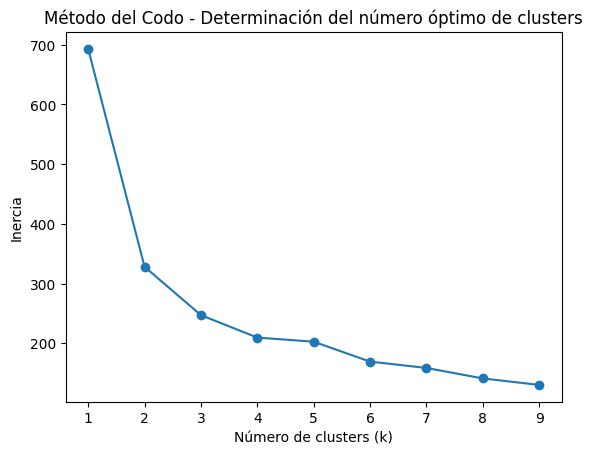

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Tomamos las columnas de los años
X = df_numerico.iloc[:, 2:].fillna(df_numerico.iloc[:, 2:].mean())

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo para elegir número de clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método del Codo - Determinación del número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()


In [32]:
# Aplicar K-Means con k=3 
kmeans = KMeans(n_clusters=3, random_state=42)
df_numerico["Cluster"] = kmeans.fit_predict(X_scaled)

# Ver primeras filas con cluster asignado
df_numerico[["MUNICIPIO", "INSTITUCION EDUCATIVA", "Cluster"]].head(10)


,MUNICIPIO,INSTITUCION EDUCATIVA,Cluster
0,Apía,Centro Educativo Bachillerato en Bienestar Rur...,0
1,Apía,Colegio Sagrada Familia,2
2,Apía,Instituto Técnico Industrial Integrado Santo T...,2
3,Apía,IE LA FLORESTA - Sede Única,2
4,Balboa,Colegio Oficial Mixto Santo Domingo Savio,2
5,Balboa,Tambores,0
6,Balboa,Centro Educativo Bachillerato en Bienestar Rur...,2
7,Belén de umbría,Colegio Oficial Juan Hurtado,2
8,Belén de umbría,Colegio Oficial Nuestra Señora Del Rosario,2
9,Belén de umbría,Colegio Técnico Agropecuario Taparcal,2


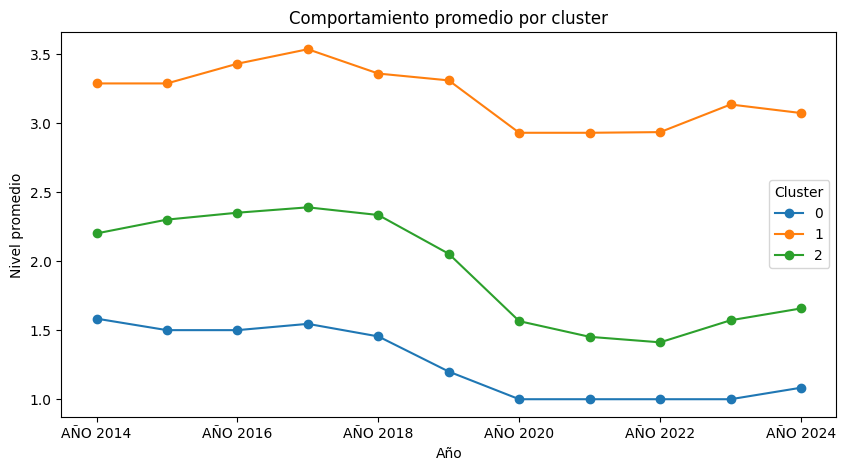

In [33]:
# Promedios por cluster
cluster_mean = df_numerico.groupby("Cluster").mean(numeric_only=True).T

cluster_mean.plot(figsize=(10,5), marker='o')
plt.title("Comportamiento promedio por cluster")
plt.ylabel("Nivel promedio")
plt.xlabel("Año")
plt.show()


In [35]:

# Seleccionamos una institución y creamos la serie temporal

# Filtramos una institución específica (puedes cambiar el nombre)
institucion = "Colegio Sagrada Familia"

# Filtrar los datos de esa institución
fila = df.loc[df["INSTITUCION EDUCATIVA"] == institucion]

# Verificar que sí exista
if fila.empty:
    raise ValueError(f"No se encontró la institución '{institucion}' en el DataFrame.")

# Extraer los valores numéricos de los años
serie = fila.iloc[0, 2:]  # columnas desde la tercera en adelante

# Convertir los valores a numéricos, forzando errores a NaN
serie = pd.to_numeric(serie, errors='coerce')

# Convertir los nombres de columnas (AÑO XXXX) a tipo fecha
serie.index = pd.to_datetime(serie.index.str.extract(r"(\d{4})")[0], format="%Y")

# Asignar frecuencia anual
serie = serie.asfreq('YS')

# Verificar que la serie quedó bien
print(serie)


0
2014-01-01   NaN
2015-01-01   NaN
2016-01-01   NaN
2017-01-01   NaN
2018-01-01   NaN
2019-01-01   NaN
2020-01-01   NaN
2021-01-01   NaN
2022-01-01   NaN
2023-01-01   NaN
2024-01-01   NaN
Freq: YS-JAN, Name: 1, dtype: float64


In [32]:
serie = serie.asfreq('YS')


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calcular métricas
mae = mean_absolute_error(test, predicciones)
rmse = np.sqrt(mean_squared_error(test, predicciones))

print(f"Error absoluto medio (MAE): {mae:.3f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.3f}")


Error absoluto medio (MAE): 0.250
Raíz del error cuadrático medio (RMSE): 0.500


🔹 Regresión Lineal - MAE: 0.333, RMSE: 0.354


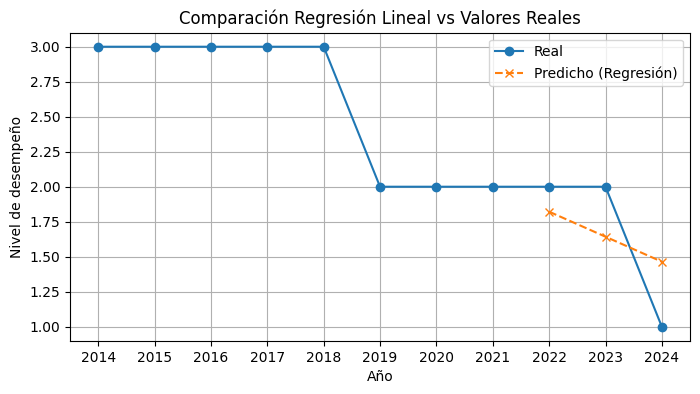

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convertir los años en números (para regresión)
X = np.arange(len(serie)).reshape(-1, 1)
y = serie.values

# Dividir igual que antes
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Entrenar modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = modelo_lr.predict(X_test)

# Evaluar error
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"🔹 Regresión Lineal - MAE: {mae_lr:.3f}, RMSE: {rmse_lr:.3f}")

# Graficar resultados
plt.figure(figsize=(8,4))
plt.plot(serie.index, serie, label='Real', marker='o')
plt.plot(serie.index[train_size:], y_pred_lr, label='Predicho (Regresión)', linestyle='--', marker='x')
plt.title("Comparación Regresión Lineal vs Valores Reales")
plt.xlabel("Año")
plt.ylabel("Nivel de desempeño")
plt.legend()
plt.grid(True)
plt.show()


🔹 Holt-Winters - MAE: 0.250, RMSE: 0.306


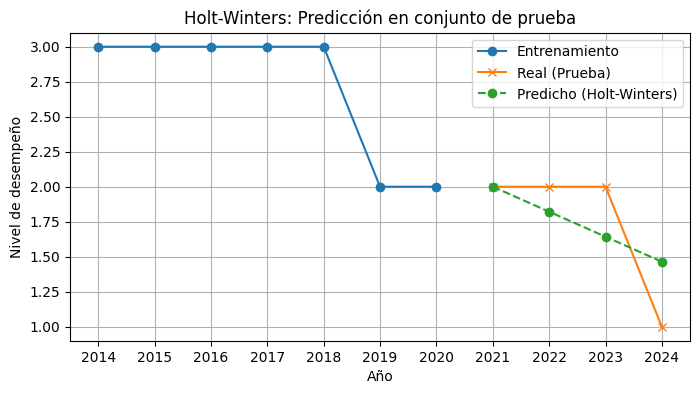

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Entrenar Holt-Winters
modelo_hw = ExponentialSmoothing(train, trend="add", seasonal=None)
resultado_hw = modelo_hw.fit()

# Predicciones sobre test
pred_hw = resultado_hw.forecast(len(test))

# Evaluar error
mae_hw = mean_absolute_error(test, pred_hw)
rmse_hw = np.sqrt(mean_squared_error(test, pred_hw))

print(f"🔹 Holt-Winters - MAE: {mae_hw:.3f}, RMSE: {rmse_hw:.3f}")

# Graficar
plt.figure(figsize=(8,4))
plt.plot(train.index, train, label='Entrenamiento', marker='o')
plt.plot(test.index, test, label='Real (Prueba)', marker='x')
plt.plot(test.index, pred_hw, label='Predicho (Holt-Winters)', linestyle='--', marker='o')
plt.title("Holt-Winters: Predicción en conjunto de prueba")
plt.xlabel("Año")
plt.ylabel("Nivel de desempeño")
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# Comparar todos los modelos
comparacion = pd.DataFrame({
    'Modelo': ['ARIMA', 'Regresión Lineal', 'Holt-Winters'],
    'MAE': [mae, mae_lr, mae_hw],
    'RMSE': [rmse, rmse_lr, rmse_hw]
})

display(comparacion.sort_values(by='RMSE'))


,Modelo,MAE,RMSE
2,Holt-Winters,0.250000,0.306186
1,Regresión Lineal,0.333333,0.353553
0,ARIMA,0.250000,0.500000
